<a href="https://colab.research.google.com/github/Nikitaion/TensorFlowLearning/blob/main/11_tensorflow_exam_skills_checklist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Skills checklist


# Проработать всё тут, а потом запустить тот же код в PyCharm с настройками под экзамен
Этот раздел удалить

##(1) TensorFlow developer skills

*   Know how to program in Python, resolve Python issues, and compile and run Python programs in PyCharm. ✅
*   Know how to find information about TensorFlow APIs, including how to find guides and API ✅
*   Know how to find information about TensorFlow APIs, including how to find guides and API references on tensorflow.org. ✅
*  Know how to debug, investigate, and solve error messages from the TensorFlow API. ✅
*  Know how to search beyond tensorflow.org, as and when necessary, to solve your TensorFlow questions. ✅
*  Know how to create ML models using TensorFlow where the model size is reasonable for the problem being solved. ✅
*  Know how to save ML models and check the model file size.
*  Understand the compatibility discrepancies between different versions of TensorFlow.

## (2) Building and training neural network models using TensorFlow 2.x


* Use TensorFlow 2.x. ✅
* Build, compile and train machine learning (ML) models using TensorFlow.
* Preprocess data to get it ready for use in a model.
* Use models to predict results.
* Build and train models for binary classification.
* Build and train models for multi-class categorization.
* Plot loss and accuracy of a trained model.
* Identify strategies to prevent overfitting, including augmentation and dropout.
* Use pretrained models (transfer learning).
* Extract features from pre-trained models.
* Ensure that inputs to a model are in the correct shape.
* Ensure that you can match test data to the input shape of a neural network
* Ensure you can match output data of a neural network to specified input shape for test data
* Understand batch loading of data.
* Use callbacks to trigger the end of training cycles.
* Use datasets from different sources.
* Use datasets in different formats, including json and csv
* Use datasets from tf.data.datasets.

## Typical architecture of a classification neural network 

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

In [228]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

Tensorflow version: 2.8.0


# Binary classification.


In [229]:

data = pd.read_csv("https://raw.githubusercontent.com/Nikitaion/TensorFlowLearning/main/tf_exam_preparation/data_banknote_authentication.txt", sep=",", header=None)
data

# 1. variance of Wavelet Transformed image (continuous)
# 2. skewness of Wavelet Transformed image (continuous)
# 3. curtosis of Wavelet Transformed image (continuous)
# 4. entropy of image (continuous)
# 5. class (integer)

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [230]:
# Preprocess data to get it ready for use in a model.
data = data.rename(columns={0: "Variance", 1: "Skewness", 2: "Kurtosis", 3: "Entropy", 4: "Class"})
data

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [231]:
data.shape, len(data), data.ndim, data.size #data.dtype

((1372, 5), 1372, 2, 6860)

In [232]:
# Shuffle data
data = data.sample(frac=1).reset_index(drop=True)

In [233]:
# describe data
data[["Variance", "Skewness", "Kurtosis", "Entropy"]].describe()

,Variance,Skewness,Kurtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [234]:
# count number of genuine and forged banknotes
data[["Class"]].value_counts()

Class
0        762
1        610
dtype: int64

In [235]:
# train test split
X = data[["Variance", "Skewness", "Kurtosis", "Entropy"]]
y = data[["Class"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [236]:
X_train

,Variance,Skewness,Kurtosis,Entropy
529,4.21640,9.46070,-4.92880,-5.236600
243,3.33970,-4.61450,3.98230,-0.237510
1309,1.37540,8.87930,-1.91360,-0.537510
664,-1.08020,2.19960,-2.58620,-1.275900
745,3.52510,0.72010,1.69280,0.644380
...,...,...,...,...
1095,-2.41150,-9.13590,9.34440,-0.652590
1130,3.77980,-3.31090,2.64910,0.066365
1294,-0.64472,-4.60620,8.34700,-2.709900
860,-6.73870,6.98790,0.67833,-7.588700


In [237]:
X_test

,Variance,Skewness,Kurtosis,Entropy
430,0.23460,-4.51520,2.11950,1.444800
588,-3.39240,3.35640,-0.72004,-3.523300
296,-1.95510,-6.97560,5.53830,-0.128890
184,-2.12100,-0.05588,1.94900,1.353000
244,0.77765,5.97810,1.19410,-0.352600
...,...,...,...,...
1341,2.55810,2.62180,1.85130,0.402570
1100,5.01850,8.59780,-2.93750,-1.281000
620,-0.27800,8.18810,-3.13380,-2.527600
617,-1.60010,-9.58280,9.40440,0.081882


In [238]:
y_train.value_counts()

Class
0        622
1        475
dtype: int64

In [239]:
y_test.value_counts()

Class
0        140
1        135
dtype: int64

In [240]:
# Build and train models for binary classification.

# Build model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation='relu'),
  # tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  # tf.keras.layers.Dense(1)
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile 
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

# fit model
history_1 = model_1.fit(X_train,
            y_train,
            epochs=50,
            verbose=0) # set verbose=0 to make the output print less

In [241]:
# Evaluate the model
model_1.evaluate(X_test,  y_test, verbose=2)

9/9 - 0s - loss: 0.0021 - accuracy: 1.0000 - 128ms/epoch - 14ms/step


[0.0020907523576170206, 1.0]

In [242]:
model_1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 20)                100       
                                                                 
 dense_34 (Dense)            (None, 20)                420       
                                                                 
 dense_35 (Dense)            (None, 1)                 21        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [243]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history_1.history)

,loss,accuracy
0,0.541582,0.701003
1,0.320736,0.886053
2,0.197820,0.953510
3,0.120295,0.984503
4,0.073791,0.997265
5,0.048025,0.997265
6,0.032945,1.000000
7,0.022702,1.000000
8,0.016925,1.000000
9,0.013025,1.000000


Text(0.5, 1.0, 'Model_1 training curves')

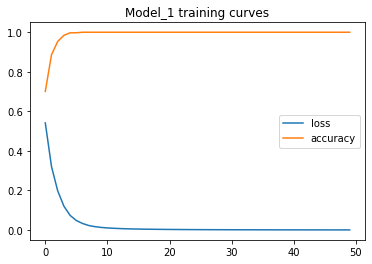

In [244]:
# Plot the loss curves
pd.DataFrame(history_1.history).plot()
plt.title("Model_1 training curves")

Also we can find best learning rate and plot confusion matrix. See: https://github.com/Nikitaion/TensorFlowLearning/blob/main/02_neural_network_classification_with_tensorflow.ipynb

# Multiclass classification

In [245]:
fifa_19_ds = pd.read_csv("https://raw.githubusercontent.com/Nikitaion/TensorFlowLearning/main/tf_exam_preparation/fifa_19.csv")
fifa_19_ds.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [246]:
fifa_19_ds = fifa_19_ds.drop(axis=1, labels=["Name", "Unnamed: 0", "ID", "Photo", "Flag", "Overall", "Potential", "Club", "Club Logo", "Value", "Wage", "International Reputation", "Work Rate", "Body Type", "Real Face", "Jersey Number", "Joined", "Loaned From", "Contract Valid Until", "Release Clause"])
fifa_19_ds.head()

,Age,Nationality,Special,Preferred Foot,Weak Foot,Skill Moves,Position,Height,Weight,LS,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,2202,Left,4.0,4.0,RF,5'7,159lbs,88+2,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,2228,Right,4.0,5.0,ST,6'2,183lbs,91+3,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,2143,Right,5.0,5.0,LW,5'9,150lbs,84+3,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,1471,Right,3.0,1.0,GK,6'4,168lbs,NaN,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,2281,Right,5.0,4.0,RCM,5'11,154lbs,82+3,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [247]:
fifa_19_ds.columns

Index(['Age', 'Nationality', 'Special', 'Preferred Foot', 'Weak Foot',
       'Skill Moves', 'Position', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [248]:
fifa_19_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 69 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              18207 non-null  int64  
 1   Nationality      18207 non-null  object 
 2   Special          18207 non-null  int64  
 3   Preferred Foot   18159 non-null  object 
 4   Weak Foot        18159 non-null  float64
 5   Skill Moves      18159 non-null  float64
 6   Position         18147 non-null  object 
 7   Height           18159 non-null  object 
 8   Weight           18159 non-null  object 
 9   LS               16122 non-null  object 
 10  ST               16122 non-null  object 
 11  RS               16122 non-null  object 
 12  LW               16122 non-null  object 
 13  LF               16122 non-null  object 
 14  CF               16122 non-null  object 
 15  RF               16122 non-null  object 
 16  RW               16122 non-null  object 
 17  LAM         

In [249]:
fifa_19_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0
Finishing,18159.0,45.550911,19.525820,2.0,30.0,49.0,62.0,95.0
HeadingAccuracy,18159.0,52.298144,17.379909,4.0,44.0,56.0,64.0,94.0
ShortPassing,18159.0,58.686712,14.699495,7.0,54.0,62.0,68.0,93.0
Volleys,18159.0,42.909026,17.694408,4.0,30.0,44.0,57.0,90.0
Dribbling,18159.0,55.371001,18.910371,4.0,49.0,61.0,68.0,97.0


In [250]:
fifa_19_ds.isnull().sum()


Age                0
Nationality        0
Special            0
Preferred Foot    48
Weak Foot         48
                  ..
GKDiving          48
GKHandling        48
GKKicking         48
GKPositioning     48
GKReflexes        48
Length: 69, dtype: int64

In [251]:
missing_height = fifa_19_ds[fifa_19_ds['Height'].isnull()].index.tolist()
missing_height

[13236,
 13237,
 13238,
 13239,
 13240,
 13241,
 13242,
 13243,
 13244,
 13245,
 13246,
 13247,
 13248,
 13249,
 13250,
 13251,
 13252,
 13253,
 13254,
 13255,
 13256,
 13257,
 13258,
 13259,
 13260,
 13261,
 13262,
 13263,
 13264,
 13265,
 13266,
 13267,
 13268,
 13269,
 13270,
 13271,
 13272,
 13273,
 13274,
 13275,
 13276,
 13277,
 13278,
 13279,
 13280,
 13281,
 13282,
 13283]

In [252]:
len(fifa_19_ds[fifa_19_ds['Height'].isnull()])

48

In [253]:
# Delete all rows where Height == null
fifa_19_ds = fifa_19_ds.dropna(subset=['Height'])

In [254]:
# How much null now?
fifa_19_ds.isnull().sum().head(15)

Age                  0
Nationality          0
Special              0
Preferred Foot       0
Weak Foot            0
Skill Moves          0
Position            12
Height               0
Weight               0
LS                2037
ST                2037
RS                2037
LW                2037
LF                2037
CF                2037
dtype: int64

In [255]:
fifa_19_ds = fifa_19_ds.dropna(subset=['LS'])

In [256]:
fifa_19_ds.isnull().sum().head(40)
# No null values now

Age                0
Nationality        0
Special            0
Preferred Foot     0
Weak Foot          0
Skill Moves        0
Position           0
Height             0
Weight             0
LS                 0
ST                 0
RS                 0
LW                 0
LF                 0
CF                 0
RF                 0
RW                 0
LAM                0
CAM                0
RAM                0
LM                 0
LCM                0
CM                 0
RCM                0
RM                 0
LWB                0
LDM                0
CDM                0
RDM                0
RWB                0
LB                 0
LCB                0
CB                 0
RCB                0
RB                 0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
dtype: int64

In [257]:
fifa_19_ds.isnull().sum().tail(30)
# No null values now

Volleys           0
Dribbling         0
Curve             0
FKAccuracy        0
LongPassing       0
BallControl       0
Acceleration      0
SprintSpeed       0
Agility           0
Reactions         0
Balance           0
ShotPower         0
Jumping           0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
Composure         0
Marking           0
StandingTackle    0
SlidingTackle     0
GKDiving          0
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
dtype: int64

In [258]:
x = "88+2"
x

'88+2'

In [259]:
# pd.to_numeric(fifa_19_ds["LS"])

In [260]:
# fifa_19_ds["LS"].astype(int)

In [261]:
fifa_19_ds.head()

,Age,Nationality,Special,Preferred Foot,Weak Foot,Skill Moves,Position,Height,Weight,LS,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,2202,Left,4.0,4.0,RF,5'7,159lbs,88+2,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,2228,Right,4.0,5.0,ST,6'2,183lbs,91+3,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,2143,Right,5.0,5.0,LW,5'9,150lbs,84+3,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,27,Belgium,2281,Right,5.0,4.0,RCM,5'11,154lbs,82+3,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,Belgium,2142,Right,4.0,4.0,LF,5'8,163lbs,83+3,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


In [262]:
print('Total number of countries : {0}'.format(fifa_19_ds['Nationality'].nunique()))


Total number of countries : 163


In [263]:
fifa_19_ds['Nationality'].value_counts()

England                 1483
Germany                 1031
Spain                    955
Argentina                839
France                   810
                        ... 
Liberia                    1
Mauritius                  1
United Arab Emirates       1
Kuwait                     1
Botswana                   1
Name: Nationality, Length: 163, dtype: int64

In [264]:
def feets_to_centimeters(df_value):
  feets_and_inches = df_value.split("'")
  feets = int(feets_and_inches[0])
  inches = int(feets_and_inches[1])
  centimeters = round((feets * 12 + inches) * 2.54)

  return centimeters

In [265]:
# For changing height
fifa_19_ds['Height'].apply(feets_to_centimeters)

0        170
1        188
2        175
4        180
5        173
        ... 
18202    175
18203    190
18204    173
18205    178
18206    178
Name: Height, Length: 16122, dtype: int64

In [266]:
# For changing weight
fifa_19_ds['Weight'].apply(lambda x: int(x[:-3]))

0        159
1        183
2        150
4        154
5        163
        ... 
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 16122, dtype: int64

In [267]:
# For LS - RB
fifa_19_ds['LS'].apply(lambda x: int(x[:2]) + int(x[-1:]))

0        90
1        94
2        87
4        85
5        86
         ..
18202    44
18203    47
18204    47
18205    49
18206    45
Name: LS, Length: 16122, dtype: int64

In [268]:
# To numbers: Nationality, Preferred Foot(0/1), Position(y), Weight(remove lbs), height(from ft'inches to meters or sentimeters), LS-RB - sum
# LS-RB если не будет другого варианта - разложить на множители (число слева от плюса в int и число справа от плюса в int)  и сложить их

# Национальность, нога и позиция попробовать сперва без numeric, а потом улучшить и перевести в цифры 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html https://stackoverflow.com/questions/47595268/convert-classes-to-numeric-in-a-pandas-dataframe

# Возможно правильно будет сделать TextVectorization layer

In [269]:
fifa_19_ds.head()

,Age,Nationality,Special,Preferred Foot,Weak Foot,Skill Moves,Position,Height,Weight,LS,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,2202,Left,4.0,4.0,RF,5'7,159lbs,88+2,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,2228,Right,4.0,5.0,ST,6'2,183lbs,91+3,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,2143,Right,5.0,5.0,LW,5'9,150lbs,84+3,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,27,Belgium,2281,Right,5.0,4.0,RCM,5'11,154lbs,82+3,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,Belgium,2142,Right,4.0,4.0,LF,5'8,163lbs,83+3,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


In [270]:
# Weight
fifa_19_ds['Weight'] = fifa_19_ds['Weight'].apply(lambda x: int(x[:-3]))
# Height
fifa_19_ds['Height'] = fifa_19_ds['Height'].apply(feets_to_centimeters)
# LS - RB
fifa_19_ds['Height']

0        170
1        188
2        175
4        180
5        173
        ... 
18202    175
18203    190
18204    173
18205    178
18206    178
Name: Height, Length: 16122, dtype: int64

In [271]:
fifa_19_ds[["LS", "ST"]].apply(lambda x: int(x[:2]) + int(x[-1:]))

TypeError: ignored

In [272]:
test_df = pd.DataFrame({
    'col0': [2222, 3333, 4444, 5555, 6666],
    'colA': [1111, 2222, 3333, 4444, 5555],
    'colB': [True, False, None, False, True],
    'colC': ['a', 'b', 'c', 'd', 'e'],
    'colD': [1.0, 2.0, 3.0, 4.0, 5.0]
})
test_df

,col0,colA,colB,colC,colD
0,2222,1111,True,a,1.0
1,3333,2222,False,b,2.0
2,4444,3333,None,c,3.0
3,5555,4444,False,d,4.0
4,6666,5555,True,e,5.0


In [273]:
test_df[["col0", "colA"]].apply(lambda x: int(x[:2]) + int(x[-1:]))

TypeError: ignored

In [ ]:
test_df[["col0", "colA"]].apply(lambda x: x+1)

In [274]:
test_df = pd.DataFrame({
    'col0': ['22x2', '33x3', '44x4', '55x5', '66x6'],
    'colA': ['11x1', '22x2', '33x3', '44x4', '55x5'],
    'colB': [True, False, None, False, True],
    'colC': ['a', 'b', 'c', 'd', 'e'],
    'colD': [1.0, 2.0, 3.0, 4.0, 5.0]
})
test_df

,col0,colA,colB,colC,colD
0,22x2,11x1,True,a,1.0
1,33x3,22x2,False,b,2.0
2,44x4,33x3,None,c,3.0
3,55x5,44x4,False,d,4.0
4,66x6,55x5,True,e,5.0


In [275]:
test_df[["col0", "colA"]].apply(lambda x: x.replace("x", ""))

,col0,colA
0,22x2,11x1
1,33x3,22x2
2,44x4,33x3
3,55x5,44x4
4,66x6,55x5


In [276]:
df = test_df[["col0", "colA"]]
df

,col0,colA
0,22x2,11x1
1,33x3,22x2
2,44x4,33x3
3,55x5,44x4
4,66x6,55x5


In [277]:
df.apply(lambda x: x.replace("x", ""))

,col0,colA
0,22x2,11x1
1,33x3,22x2
2,44x4,33x3
3,55x5,44x4
4,66x6,55x5


In [278]:
df

,col0,colA
0,22x2,11x1
1,33x3,22x2
2,44x4,33x3
3,55x5,44x4
4,66x6,55x5


In [279]:
test_df["col0"].apply(lambda x: x.replace("x", ""), axis=1, result_type='expand')

TypeError: ignored

In [ ]:
fifa_19_ds[["LS", "ST"]]

In [ ]:
# y - Position
# Positions - goalkeeper/forward_player/midfielder_player/defender_player

goalkeeper = ["GK"]
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]


In [280]:
def change_positions(letters):
  if letters in midfielder_player:
    return 0
  elif letters in forward_player:
    return 1
  elif letters in defender_player:
    return 3

  return 4

In [281]:
print(change_positions("GK"))

4


In [282]:
# df.loc[df["Position"] == "GK", "Position"] = 0

# df.loc[df["Position"].isin(defender_player), "Position"] = 1

# df.loc[df["Position"].isin(midfielder_player), "Position"] = 2

# df.loc[df["Position"].isin(forward_player), "Position"] = 3


In [283]:
fifa_19_ds["Position"].apply(change_positions)

0        1
1        1
2        1
4        0
5        1
        ..
18202    0
18203    1
18204    1
18205    1
18206    0
Name: Position, Length: 16122, dtype: int64

In [284]:
fifa_19_ds["Position"] = fifa_19_ds["Position"].apply(change_positions)

In [285]:
fifa_19_ds.head(9)

,Age,Nationality,Special,Preferred Foot,Weak Foot,Skill Moves,Position,Height,Weight,LS,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,2202,Left,4.0,4.0,1,170,159,88+2,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,2228,Right,4.0,5.0,1,188,183,91+3,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,2143,Right,5.0,5.0,1,175,150,84+3,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,27,Belgium,2281,Right,5.0,4.0,0,180,154,82+3,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,Belgium,2142,Right,4.0,4.0,1,173,163,83+3,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
6,32,Croatia,2280,Right,4.0,4.0,0,173,146,77+3,...,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
7,31,Uruguay,2346,Right,4.0,3.0,1,183,190,87+5,...,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
8,32,Spain,2201,Right,3.0,3.0,3,183,181,73+3,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0
10,29,Poland,2152,Right,4.0,4.0,1,183,176,87+3,...,88.0,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0


In [286]:
# создать test and train
X = fifa_19_ds.drop(["Position"], axis=1)
y = fifa_19_ds["Position"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
X_train

,Age,Nationality,Special,Preferred Foot,Weak Foot,Skill Moves,Height,Weight,LS,ST,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
13695,23,Jamaica,1663,Left,3.0,3.0,175,143,59+2,59+2,...,46.0,53.0,44.0,44.0,43.0,7.0,12.0,15.0,7.0,9.0
10833,26,Guatemala,1716,Left,3.0,2.0,183,154,57+2,57+2,...,55.0,55.0,63.0,66.0,63.0,13.0,9.0,11.0,9.0,7.0
15388,21,Republic of Ireland,1523,Left,3.0,2.0,185,161,49+2,49+2,...,52.0,44.0,55.0,54.0,57.0,14.0,6.0,13.0,11.0,10.0
15403,22,Korea Republic,1582,Right,3.0,2.0,175,154,54+2,54+2,...,42.0,51.0,51.0,39.0,47.0,8.0,12.0,11.0,9.0,12.0
2657,32,Ukraine,1814,Right,3.0,3.0,188,192,72+2,72+2,...,80.0,72.0,51.0,41.0,39.0,9.0,9.0,7.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14916,21,South Africa,1482,Left,3.0,2.0,165,137,45+2,45+2,...,42.0,55.0,64.0,61.0,57.0,9.0,14.0,7.0,8.0,11.0
5924,23,Spain,1755,Right,2.0,3.0,173,150,56+2,56+2,...,44.0,65.0,65.0,66.0,65.0,9.0,10.0,6.0,7.0,13.0
967,23,Argentina,2073,Right,3.0,4.0,188,185,75+2,75+2,...,70.0,74.0,63.0,52.0,48.0,11.0,8.0,15.0,12.0,7.0
17794,19,Chile,1490,Right,2.0,3.0,173,159,52+2,52+2,...,62.0,57.0,69.0,41.0,35.0,7.0,5.0,6.0,7.0,6.0


In [287]:
y_train

13695    0
10833    3
15388    3
15403    0
2657     1
        ..
14916    3
5924     3
967      0
17794    1
8026     3
Name: Position, Length: 12897, dtype: int64

In [288]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12897, 68), (3225, 68), (12897,), (3225,))

## Typical architecture of a classification neural network 

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

In [289]:
type(X_train), X_train.shape

(pandas.core.frame.DataFrame, (12897, 68))

In [291]:
type(y_train), y_train.shape

(pandas.core.series.Series, (12897,))

In [293]:
y_cat = tf.keras.utils.to_categorical(y)


In [294]:
y_cat

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [295]:
# np.asarray(y_train).astype(np.float32)

In [296]:
# X_train=np.asarray(X_train).astype(np.int)

# y_train=np.asarray(y_train).astype(np.int)

In [298]:
# build, compile, fit
# Build and train models for binary classification.

# Build model
model_categorical_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation='relu'),
  # tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

# compile 
model_categorical_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=["accuracy"])

# fit model
model_categorical_1 = model_1.fit(epochs=50,
                                  x=X_train,
                                  y=np.asarray(y_train).astype(np.float32))

ValueError: ignored

In [ ]:
# проверить результаты. если нужно - дорабоать модель

In [ ]:
# если нужно перевести все значения 0-1, float32

In [ ]:
# build, compile, fit...

In [ ]:
# visualize

In [ ]:
# Загрузить эксель


# Почистить/заполнить missed values

# От 0 до 1

In [ ]:
# Know how to save ML models and check the model file size.
# Use models to predict results.
# Build and train models for multi-class categorization.
# Plot loss and accuracy of a trained model.
# Identify strategies to prevent overfitting, including augmentation and dropout.
# Use pretrained models (transfer learning).
# Extract features from pre-trained models.
# Ensure that inputs to a model are in the correct shape.
# Ensure that you can match test data to the input shape of a neural network
# Ensure you can match output data of a neural network to specified input shape for test data
# Understand batch loading of data.
# Use callbacks to trigger the end of training cycles.

# Use datasets from different sources.
# Use datasets in different formats, including json and csv
# Use datasets from tf.data.datasets.

# (3) Image classification


*   Define Convolutional neural networks with Conv2D and pooling layers.
*   Build and train models to process real-world image datasets.
*   Understand how to use convolutions to improve your neural network
*   Use real-world images in different shapes and sizes
*   Use image augmentation to prevent overfitting.
*   Use ImageDataGenerator.
*   Understand how ImageDataGenerator labels images based on the directory structure.


# (4) Natural language processing (NLP)


*   Build natural language processing systems using TensorFlow.
*   Prepare text to use in TensorFlow models.
*   Build models that identify the category of a piece of text using binary categorization
*   Build models that identify the category of a piece of text using multi-class categorization
*   Use word embeddings in your TensorFlow model.
*   Use LSTMs in your model to classify text for either binary or multi-class categorization.
*   Add RNN and GRU layers to your mode
*   Use RNNS, LSTMs, GRUs and CNNs in models that work with text.
*   Train LSTMs on existing text to generate text (such as songs and poetry) 


# (5) Time series, sequences and predictions


*   Train, tune and use time series, sequence and prediction models
*   Train models to predict values for both univariate and multivariate time series.
*   Prepare data for time series learning.
*   Understand Mean Absolute Error (MAE) and how it can be used to evaluate accuracy of sequence models.
*   Use RNNs and CNNs for time series, sequence and forecasting models
*   Identify when to use trailing versus centred windows
*   Use TensorFlow for forecasting
*   Prepare features and labels
*   Identify and compensate for sequence bias
*   Adjust the learning rate dynamically in time series, sequence and prediction models

## Troubleshooting tidbits


* **Input and output shapes** — print these out if you're stuck.
* **Input and output datatypes** — TensorFlow usually prefers float32.
* **Output activation functions** — for classification: `sigmoid` vs `softmax`, which one should you use?
* **Loss functions** — for classification `sparse_categorical_crossentropy` vs `categorical_crossentropy`, which one should you use?
* **Ways to improve a model** — if your model isn't performing as well as it should, what can you do?

Common ways to improve a deep model:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization funcion
* Change the learning rate
* Fitting on more data
* Fitting for longer

In [ ]:
# Save a model using the SavedModel format
model_name.save('name_for_file')

# Save a model using the HDF5 format
model_name.save("name_for_h5_file.h5") # note the addition of '.h5' on the end

# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("name_for_file")

# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("name_for_h5_file.h5")

loaded_saved_model.summary()
loaded_h5_model.summary()

In [ ]:
# Download saved model (or any file) from Google Colab
from google.colab import files
files.download("name_for_h5_file.h5")


## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

> 📖 Resources for more on preprocessing data:
* [Scikit-Learn's documentation on preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data).
* [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).

## Typical architecture of a regression neural network 

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.*  ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

## Typical architecture of a classification neural network 

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

## Improving a model

To improve our model, we can alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose a different optimization function (such as the [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

How about we try adding more neurons, an extra layer and our friend the Adam optimizer?

Surely doing this will result in predictions better than guessing...

> **Note:** If you're using TensorFlow 2.7.0+ the original code from the following cells may have caused some errors. They've since been updated to fix those errors. You can see explanations on what happened at the following resources:
* [Example Colab Notebook](https://colab.research.google.com/drive/1_dlrB_DJOBS9c9foYJs49I0YwN7LTakl?usp=sharing)
* [TensorFlow for Deep Learning GitHub Discussion on TensorFlow 2.7.0 breaking changes](https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278)